In [1]:
import pickle as pkl
import plotly.express as pex
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/snap99.pkl", 'rb'))

In [3]:
  
def line_eq(snap, l):
    x = np.zeros(l*3)
    y = np.zeros(l*3)
    x0 = 0; y0 = 1.3
    if snap == 33:
        b = 0.8
        x2 = 1.5
    else:
        b = 0.85
        x2= 1.6
    x1 = (y0 - b)/0.88
    x2
    x[:l] = np.linspace(x0, x1, l)
    y[:l] = y0
    x[l:l*2] = np.linspace(x1, x2, l)
    y[l:l*2] = 0.88*x[l:l*2] + b
    x[l*2:] = x2
    y[l*2:] = np.linspace(0.88 * x2 + b, 2.5, l)
    return x, y

def is_sf(vj, uv, snap):
    
    if snap >= 50: # z <= 1
        b = 0.85
    else:
        b = 0.8
    mask2 = uv > 0.88 * vj + b
    if snap >= 40: # z <= 1.5
        vjlim = 1.6
        uvlim = 1.3
    elif snap >= 33:
        vjlim = 1.5
        uvlim = 1.3
    else:
        vjlim = 1.4
        uvlim = 1.2
        
    mask3 = vj < vjlim
    mask1 = uv > uvlim

    sf_mask = mask1 & mask2 & mask3
    return sf_mask

def dist(vj, uv, snap, l):
    x, y = line_eq(snap, l)
    sf_mask = is_sf(vj, uv, snap)
    dist = np.zeros_like(vj)
    for gal in range(len(vj)):
        galvj = vj[gal]
        galuv = uv[gal]
        dist[gal] = np.min(np.sqrt((x - galvj)**2 + (y - galuv)**2))
    
    dist[sf_mask] *= -1
    return dist

In [4]:
snap = 99
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]

(array([   2.,    2.,    7.,    7.,   22.,   30.,   29.,   32.,   40.,
          54.,   67.,  102.,  134.,  185.,  272.,  408.,  490.,  718.,
         883., 1080., 1281., 1413., 1527., 1543., 1570., 1559., 1443.,
        1315., 1177.,  960.,  824.,  765.,  656.,  525.,  491.,  451.,
         423.,  457.,  502.,  743., 1090., 1281., 1202., 1256., 1377.,
         899.,  548.,  239.,   81.,   13.]),
 array([-0.17921448, -0.15787704, -0.13653961, -0.11520218, -0.09386475,
        -0.07252731, -0.05118988, -0.02985245, -0.00851501,  0.01282242,
         0.03415985,  0.05549728,  0.07683472,  0.09817215,  0.11950959,
         0.14084701,  0.16218445,  0.18352188,  0.20485932,  0.22619675,
         0.24753419,  0.2688716 ,  0.29020905,  0.31154647,  0.33288392,
         0.35422134,  0.37555876,  0.3968962 ,  0.41823363,  0.43957108,
         0.4609085 ,  0.48224595,  0.5035834 ,  0.5249208 ,  0.5462582 ,
         0.56759566,  0.5889331 ,  0.61027056,  0.63160795,  0.6529454 ,
         0.67428

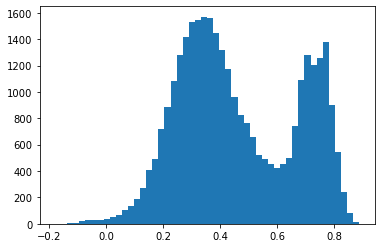

In [6]:
plt.hist(gr, bins = 50)

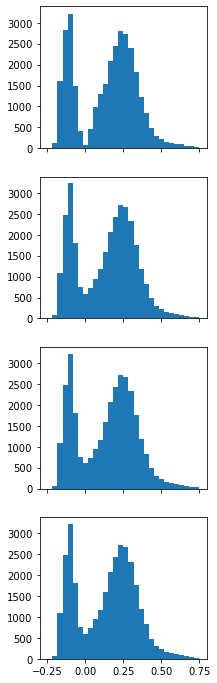

In [7]:
tests = [10, 100, 1000, 10000]
fig, axes = plt.subplots(len(tests), 1, figsize=(3, 3*len(tests)), sharex = True, sharey = True)
norm = mpl.colors.LogNorm(1, 1e4)
for i in range(len(tests)):
    plt.sca(axes[i])
    uvjdist = dist(vj, uv, snap, tests[i])
    
    plt.hist(uvjdist, bins = 30, range = [-0.25, 0.75])
    

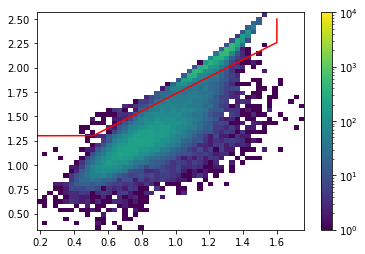

In [27]:
x, y = line_eq(snap, 10000)
plt.hist2d(vj, uv, norm = norm, bins = 50)
plt.colorbar()
plt.plot(x, y, color = 'red')

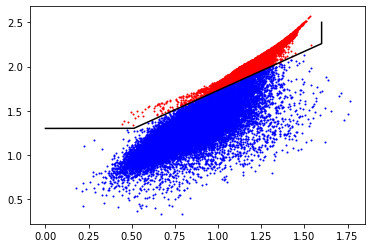

In [35]:
nonsf = is_sf(vj, uv, snap)
plt.scatter(vj[nonsf], uv[nonsf], color = 'red', s = 1)

plt.scatter(vj[~nonsf], uv[~nonsf], color = 'blue', s = 1)

plt.plot(x, y, color = 'black')

In [8]:
snap = 99
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/snap99.pkl", 'rb'))
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]
uvjdist = dist(vj, uv, snap, 1000)

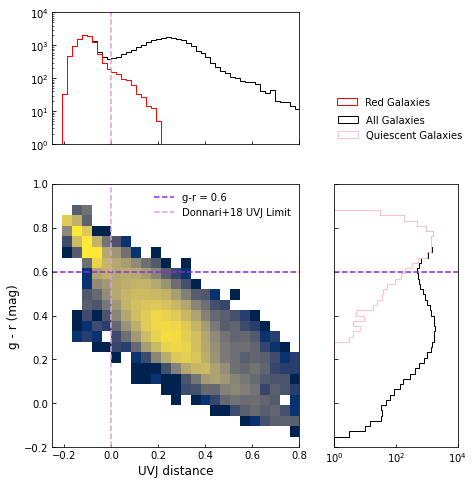

In [33]:
nlims = [1, 1e4]

fig = plt.figure(figsize = (18, 8))
regsize = 3
ratio = 0.5
gsp = mpl.gridspec.GridSpec(2, 5, 
                            width_ratios = [regsize, regsize*ratio, regsize, regsize*ratio, regsize*ratio], 
                            height_ratios = [regsize*ratio, regsize], figure = fig)

grrange = [-0.2, 1.0]
uvjrange = [-0.25, 0.8]
bn = 25
ax = fig.add_subplot(gsp[1, 0])
plt.sca(ax)
uvjdist = dist(vj, uv, snap, 1000)
norm = mpl.colors.LogNorm(1, 1e3)
cmap = mpl.cm.get_cmap('cividis')

plt.hist2d(uvjdist, gr,  bins = bn, range = [uvjrange, grrange], norm = norm, cmap = cmap)
plt.xlim(uvjrange)
plt.ylim(grrange)
plt.plot(plt.xlim(), [0.6, 0.6], color = 'blueviolet', linestyle = '--', label = 'g-r = 0.6')
plt.plot([0, 0], plt.ylim(), color = 'plum', linestyle = '--', label = 'Donnari+18 UVJ Limit')
plt.legend(frameon = False, loc = 'upper right')
ax.tick_params(which = 'both', direction = 'in')
plt.ylabel('g - r (mag)', fontsize = 12)
plt.xlabel('UVJ distance', fontsize = 12)

ax = fig.add_subplot(gsp[0, 0])
plt.sca(ax)
isred = gr > 0.6
uvjhist = plt.hist(uvjdist, bins = bn*2, range = uvjrange, histtype = 'step', color = 'gray',
                  label = 'UVJ')
redhist = plt.hist(uvjdist[isred], color = 'red', bins = bn*2, range = uvjrange, histtype = 'step', 
        label = 'g - r > 0.6\nRed Galaxies')
plt.yscale('log')
plt.xlim(uvjrange)
plt.ylim(nlims)
ax.tick_params(which = 'both', direction = 'in', labelbottom = False)
plt.plot([0, 0], plt.ylim(), color = 'plum', linestyle = '--')
plt.legend(frameon = False, loc = [1.135, 0.25])

ax = fig.add_subplot(gsp[1, 1])
plt.sca(ax)
ax.tick_params(which = 'both', direction = 'in', labelleft = False)
isq = is_sf(vj, uv, snap)
plt.hist(gr, range = grrange, color = 'black', bins = bn*2, 
         orientation = 'horizontal', histtype = 'step', label = 'All Galaxies')
qhist = plt.hist(gr[isq], range = grrange, bins = bn*2, orientation = 'horizontal', histtype = 'step', color = 'pink',
        label = 'Quiescent Galaxies')
plt.ylim(grrange)
plt.xlim(nlims)
plt.plot(plt.xlim(), [0.6, 0.6], color = 'blueviolet', linestyle = '--')
plt.xscale('log')
plt.legend(loc = [0, 1.15], frameon = False)



In [91]:
snap = 50
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/snap50.pkl", 'rb'))
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]
uvjdist = dist(vj, uv, snap, 1000)

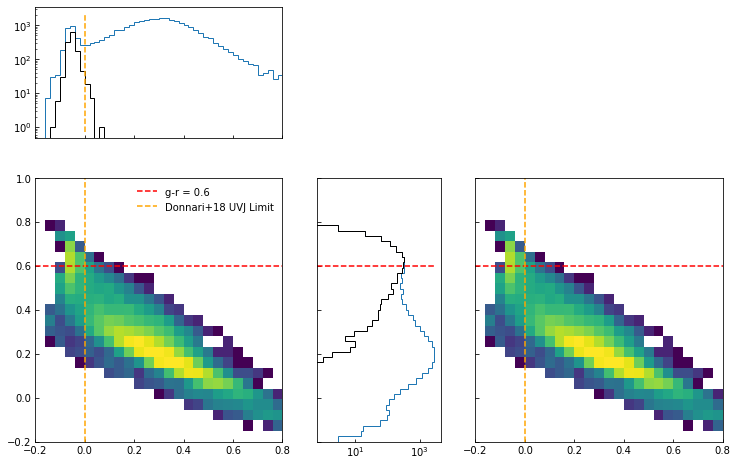

In [92]:
ax = fig.add_subplot(gsp[1, 2])
plt.sca(ax)
ax.tick_params(which = 'both', direction = 'in', labelleft = False)
plt.hist2d(uvjdist, gr,  bins = bn, range = [uvjrange, grrange], norm = norm, cmap = cmap)
plt.xlim(uvjrange)
plt.ylim(grrange)
plt.plot(plt.xlim(), [0.6, 0.6], color = 'red', linestyle = '--', label = 'g-r = 0.6')
plt.plot([0, 0], plt.ylim(), color = 'orange', linestyle = '--', label = 'Donnari+18 UVJ Limit')


(array([   3.,   15.,   18.,   59.,   94.,  110.,   91.,  112.,  161.,
         254.,  441.,  756., 1188., 1758., 2344., 2859., 2797., 2680.,
        2332., 1862., 1364., 1048.,  714.,  621.,  420.,  366.,  279.,
         273.,  302.,  240.,  293.,  263.,  334.,  326.,  323.,  290.,
         184.,  124.,   63.,   21.,    3.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.2  , -0.176, -0.152, -0.128, -0.104, -0.08 , -0.056, -0.032,
        -0.008,  0.016,  0.04 ,  0.064,  0.088,  0.112,  0.136,  0.16 ,
         0.184,  0.208,  0.232,  0.256,  0.28 ,  0.304,  0.328,  0.352,
         0.376,  0.4  ,  0.424,  0.448,  0.472,  0.496,  0.52 ,  0.544,
         0.568,  0.592,  0.616,  0.64 ,  0.664,  0.688,  0.712,  0.736,
         0.76 ,  0.784,  0.808,  0.832,  0.856,  0.88 ,  0.904,  0.928,
         0.952,  0.976,  1.   ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1322f9d90>])

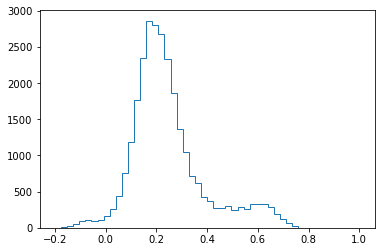

In [89]:
plt.hist(gr, range = grrange, bins = bn*2, histtype = 'step')
